<a href="https://colab.research.google.com/github/Priyanshuken18/Machine-Learning/blob/main/ML_5th_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
# Load dataset
mall_df = pd.read_csv("/content/Mall_Customers.csv")

# Display first few rows
print(mall_df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Selecting relevant numerical features
features = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


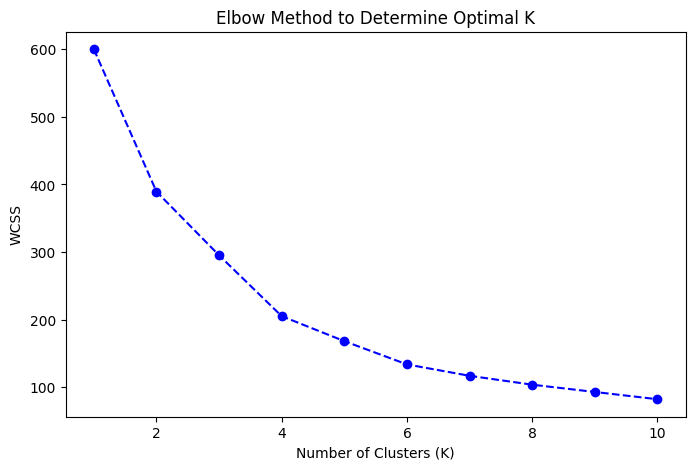

In [6]:
# Finding optimal K using WCSS (Within-Cluster Sum of Squares)
wcss = []

for k in range(1, 11):  # Testing K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


In [7]:
# Set the optimal number of clusters (K) based on the Elbow Method
optimal_k = 5

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
mall_df['Cluster'] = kmeans.fit_predict(scaled_features)


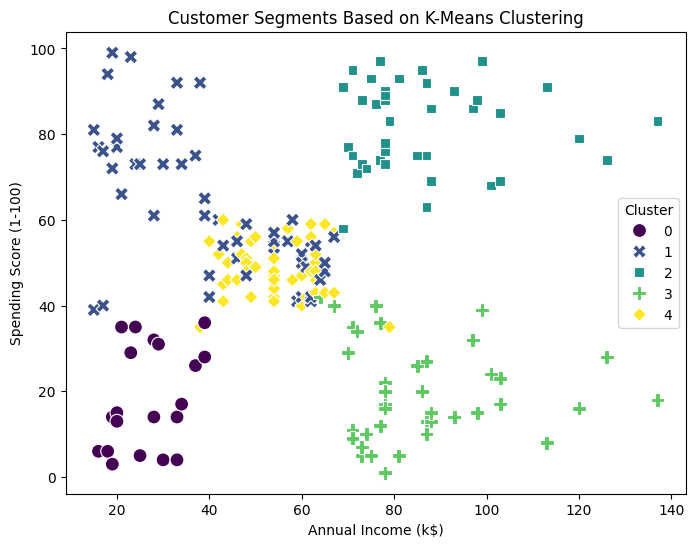

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=mall_df['Annual Income (k$)'],
    y=mall_df['Spending Score (1-100)'],
    hue=mall_df['Cluster'],
    palette='viridis',
    style=mall_df['Cluster'],
    s=100
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments Based on K-Means Clustering')
plt.legend(title='Cluster')
plt.show()


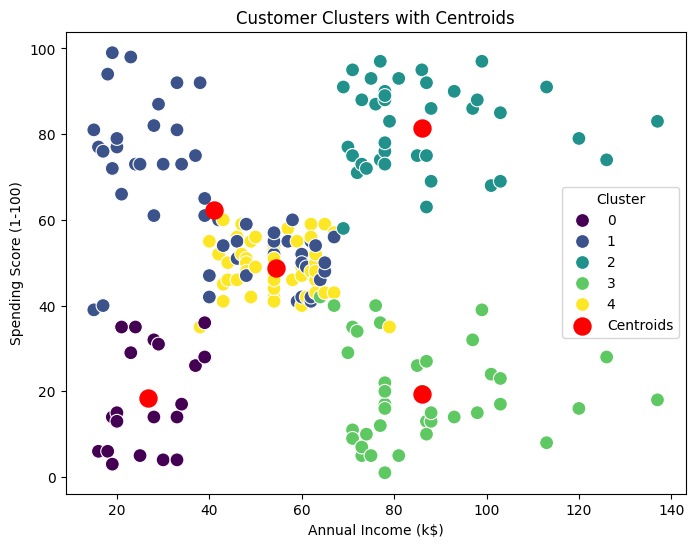

In [11]:
# Recalculate centroids (if needed)
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

# Store centroids in a DataFrame
centroid_df = pd.DataFrame(centroids_original, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Scatter plot of customer clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=mall_df['Annual Income (k$)'],
    y=mall_df['Spending Score (1-100)'],
    hue=mall_df['Cluster'],
    palette='viridis',
    s=100
)

# Plot centroids as red dots
plt.scatter(
    centroid_df['Annual Income (k$)'],
    centroid_df['Spending Score (1-100)'],
    c='red',
    s=150,
    label='Centroids'
)

# Labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters with Centroids')
plt.legend(title='Cluster')
plt.show()
